# Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [5]:
bank=pd.read_csv("E:\\DATA SCIENCE\\LMS\\ASSIGNMENT\\MY ASSIGNMENT\\Logistics regression\\bank-full.csv",";")

C:\Users\anku\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


<AxesSubplot:xlabel='y', ylabel='count'>

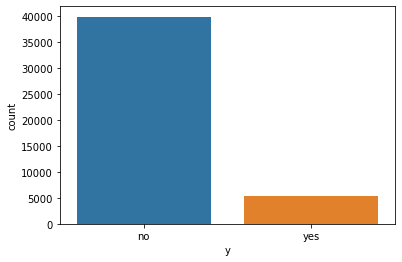

In [49]:
sns.countplot(x="y", data=bank)

As we can say from about plot that so less peoples suscribed term deposits.

In [8]:
#Check bank shape
bank.shape

(45211, 17)

In [9]:
#check data type
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
#describe of numerical columns
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
#check null value
print(bank.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
bank2=bank.drop({"job","marital","education","default","month","poutcome","job","day","contact","previous","pdays"},axis=1)
bank2

,age,balance,housing,loan,duration,campaign,y
0,58,2143,yes,no,261,1,no
1,44,29,yes,no,151,1,no
2,33,2,yes,yes,76,1,no
3,47,1506,yes,no,92,1,no
4,33,1,no,no,198,1,no
...,...,...,...,...,...,...,...
45206,51,825,no,no,977,3,yes
45207,71,1729,no,no,456,2,yes
45208,72,5715,no,no,1127,5,yes
45209,57,668,no,no,508,4,no


In [13]:
#shape of data
bank2.shape

(45211, 7)

In [14]:
bank3=bank2.drop_duplicates()
bank4=bank3.dropna()
bank4

,age,balance,housing,loan,duration,campaign,y
0,58,2143,yes,no,261,1,no
1,44,29,yes,no,151,1,no
2,33,2,yes,yes,76,1,no
3,47,1506,yes,no,92,1,no
4,33,1,no,no,198,1,no
...,...,...,...,...,...,...,...
45206,51,825,no,no,977,3,yes
45207,71,1729,no,no,456,2,yes
45208,72,5715,no,no,1127,5,yes
45209,57,668,no,no,508,4,no


In [15]:
from sklearn.preprocessing import LabelEncoder
encode =  LabelEncoder()

In [17]:
#we can use label encoder for our target column
bank4['y']=encode.fit_transform(bank4['y'])

In [26]:
bank4

,age,balance,housing,loan,duration,campaign,y
0,58,2143,yes,no,261,1,0
1,44,29,yes,no,151,1,0
2,33,2,yes,yes,76,1,0
3,47,1506,yes,no,92,1,0
4,33,1,no,no,198,1,0
...,...,...,...,...,...,...,...
45206,51,825,no,no,977,3,1
45207,71,1729,no,no,456,2,1
45208,72,5715,no,no,1127,5,1
45209,57,668,no,no,508,4,0


In [27]:
y6=bank4.iloc[:,6]
y6

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45173, dtype: int32

In [20]:
bank4.y.unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45173, dtype: int32>

In [21]:
#Dividing our data into input and Variable
x1 = bank4.iloc[:,0:6]

In [30]:
#for catagorical columns we need to create dummies variables
x2=pd.get_dummies(x1)
x2

,age,balance,duration,campaign,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,261,1,0,1,1,0
1,44,29,151,1,0,1,1,0
2,33,2,76,1,0,1,0,1
3,47,1506,92,1,0,1,1,0
4,33,1,198,1,1,0,1,0
...,...,...,...,...,...,...,...,...
45206,51,825,977,3,1,0,1,0
45207,71,1729,456,2,1,0,1,0
45208,72,5715,1127,5,1,0,1,0
45209,57,668,508,4,1,0,1,0


In [31]:
y5 = bank4.iloc[:,6]

In [32]:
y5

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45173, dtype: int32

In [24]:
classifier = LogisticRegression()

In [33]:
classifier.fit(x2,y5)

C:\Users\anku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#check data type
print(bank4.dtypes)

In [34]:
y1_pred =classifier.predict(x2)
y1_pred

array([0, 0, 0, ..., 1, 0, 0])

In [35]:
y5

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45173, dtype: int32

In [36]:
y1_pred=pd.DataFrame(y1_pred,columns=['predicted y'])
y1_pred

,predicted y
0,0
1,0
2,0
3,0
4,0
...,...
45168,1
45169,0
45170,1
45171,0


In [37]:
pd.concat([y1_pred,y6],axis=1)

,predicted y,y
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
45206,NaN,1.0
45207,NaN,1.0
45208,NaN,1.0
45209,NaN,0.0


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_metrix = confusion_matrix(y6,y1_pred)
confusion_metrix

array([[39206,   678],
       [ 4357,   932]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
print( classification_report(y6,y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39884
           1       0.58      0.18      0.27      5289

    accuracy                           0.89     45173
   macro avg       0.74      0.58      0.60     45173
weighted avg       0.86      0.89      0.86     45173

